In [1]:
import os
import numpy as np
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
import glob
import matplotlib.pyplot as plt

In [2]:
#path = './trained_models/best_model.h5'
#path = './trained_models/17eph_0.97acc_FINAL_MODELALL.h5'
path = './trained_models/FINAL_MODELALL_acc0.9825_ep26.h5'
model = load_model(path)

In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

input: (1, 256, 256, 1) ./DATA/test/00001/T2w\Image-354.png
out [[9.9999905e-01 1.0035767e-06]] index [0]
Out: NoTumor|1.000 [[9.9999905e-01 1.0035767e-06]]


input: (1, 256, 256, 1) ./DATA/test/00001/T2w\Image-300.png
out [[9.999980e-01 1.977512e-06]] index [0]
Out: NoTumor|1.000 [[9.999980e-01 1.977512e-06]]


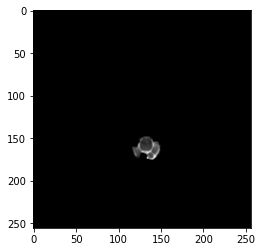

input: (1, 256, 256, 1) ./DATA/test/00001/T2w\Image-337.png
out [[0.00802392 0.9919761 ]] index [1]
Out: Tumor|0.992 [[0.00802392 0.9919761 ]]


input: (1, 256, 256, 1) ./DATA/test/00001/T2w\Image-365.png
out [[9.9999106e-01 8.9539963e-06]] index [0]
Out: NoTumor|1.000 [[9.9999106e-01 8.9539963e-06]]


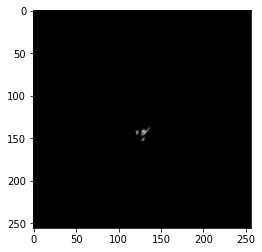

input: (1, 256, 256, 1) ./DATA/test/00001/T2w\Image-321.png
out [[0.9989446  0.00105546]] index [0]
Out: NoTumor|0.999 [[0.9989446  0.00105546]]


input: (1, 256, 256, 1) ./DATA/test/00001/T2w\Image-317.png
out [[0.9017531  0.09824691]] index [0]
Out: NoTumor|0.902 [[0.9017531  0.09824691]]


input: (1, 256, 256, 1) ./DATA/test/00001/T2w\Image-340.png
out [[0.02220928 0.97779065]] index [1]
Out: Tumor|0.978 [[0.02220928 0.97779065]]


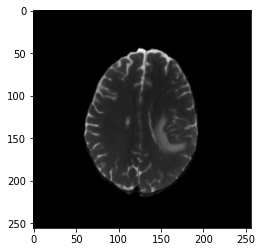

input: (1, 256, 256, 1) ./DATA/test/00001/T2w\Image-335.png
out [[0.00893731 0.99106264]] index [1]
Out: Tumor|0.991 [[0.00893731 0.99106264]]


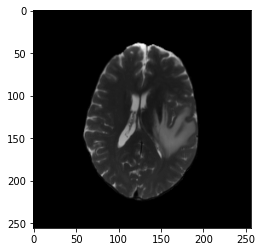

input: (1, 256, 256, 1) ./DATA/test/00001/T2w\Image-316.png
out [[9.9938941e-01 6.1051693e-04]] index [0]
Out: NoTumor|0.999 [[9.9938941e-01 6.1051693e-04]]


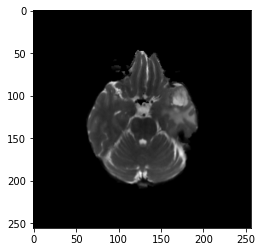

input: (1, 256, 256, 1) ./DATA/test/00001/T2w\Image-304.png
out [[9.9998915e-01 1.0861680e-05]] index [0]
Out: NoTumor|1.000 [[9.9998915e-01 1.0861680e-05]]


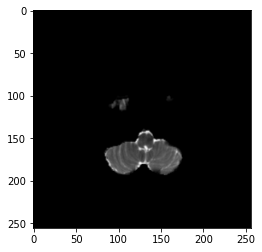

In [4]:
imgdir = './DATA/test/00001/T2w/'
images = glob.glob(os.path.join(imgdir, '*'))
import random
random.shuffle(images)
classes = {0:'NoTumor', 1:'Tumor'}
for i,imgpath in enumerate(images):
    if i>=10:
        break
    #imgpath = './DATA/test/00001/FLAIR\Image-103.png'
    img = image.load_img(imgpath, target_size=(256,256), color_mode='grayscale')
    img = image.img_to_array(img)
    img /= 255.
    img = img[None,:,:]
    print('input:',img.shape,imgpath)
    out = model.predict(img)
    index = np.argmax(out,axis=1)
    print('out',out,'index',index)
    label = f"{classes[index[0]]}|{out[0][index[0]]:.3f}"
    print('Out:',label,out)
    plt.imshow(np.squeeze(img,axis=(0,-1)), cmap='gray')
    plt.show()
    #break
    

In [22]:
intermodel = Model(inputs=model.input, outputs=[model.layers[-2].output,model.layers[-1].output])

In [28]:
feats, probs = intermodel(img)
feats = feats.numpy()
probs = probs.numpy()

In [40]:
#!pip install keract
#https://github.com/philipperemy/keract

You should consider upgrading via the 'd:\python3_6\python.exe -m pip install --upgrade pip' command.


In [44]:
from keract import get_activations
import keract

In [42]:
# call to fetch the activations of the model.
activations = get_activations(model, img, auto_compile=True)

input_1 (1, 256, 256, 1) 


conv1_pad (1, 262, 262, 1) 


conv1_conv (1, 128, 128, 64) 


conv1_bn (1, 128, 128, 64) 


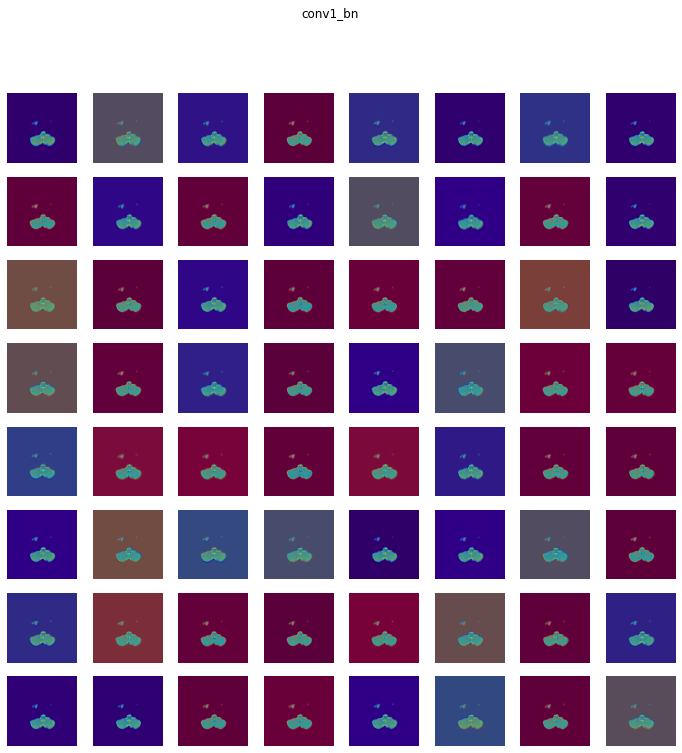

conv1_relu (1, 128, 128, 64) 


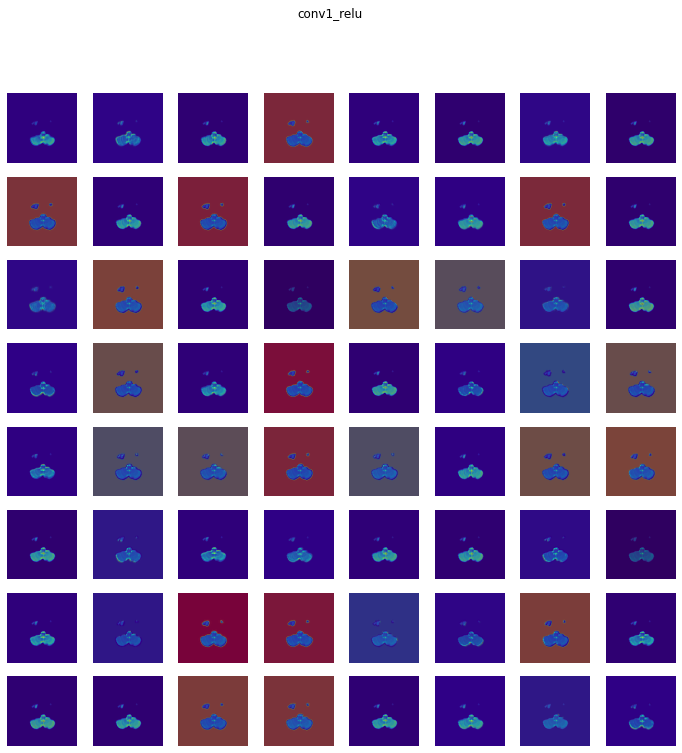

pool1_pad (1, 130, 130, 64) 


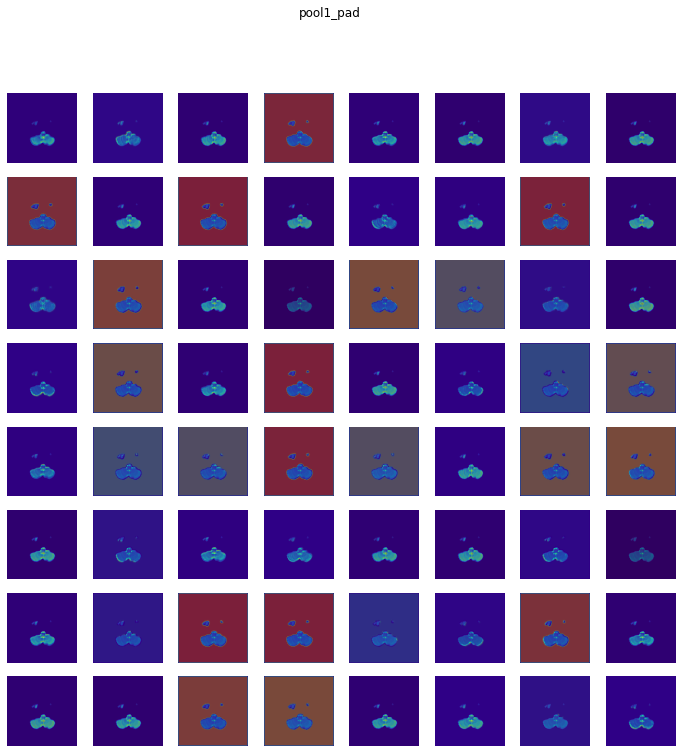

pool1_pool (1, 64, 64, 64) 


conv2_block1_1_conv (1, 64, 64, 64) 


conv2_block1_1_bn (1, 64, 64, 64) 


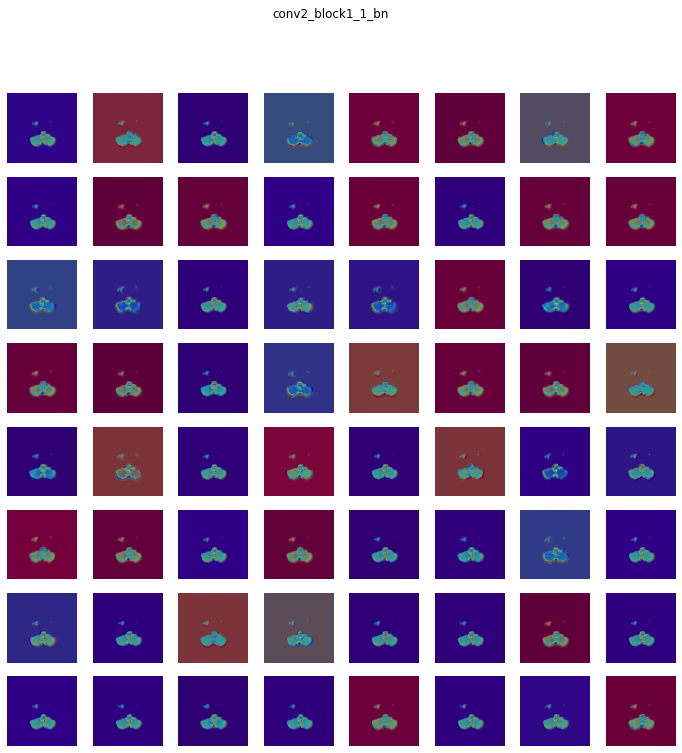

conv2_block1_1_relu (1, 64, 64, 64) 


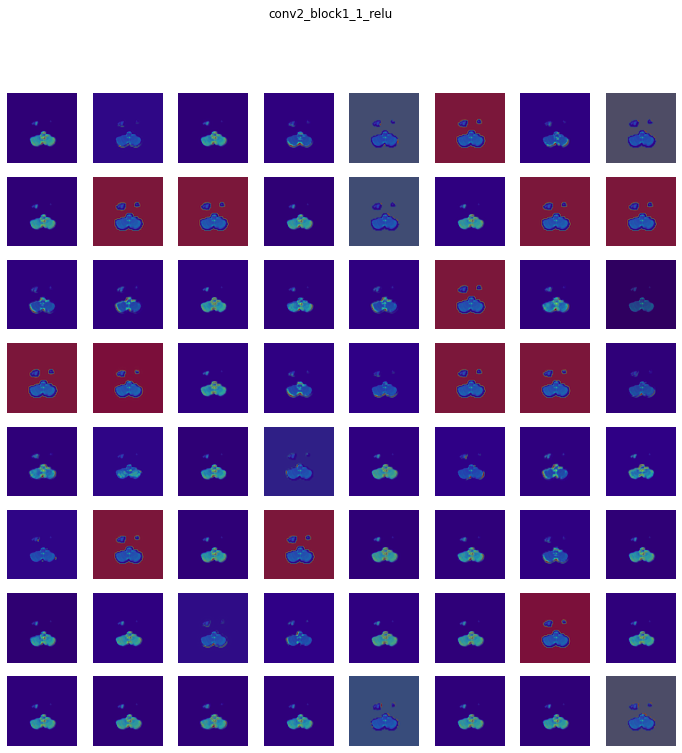

conv2_block1_2_conv (1, 64, 64, 64) 


conv2_block1_2_bn (1, 64, 64, 64) 


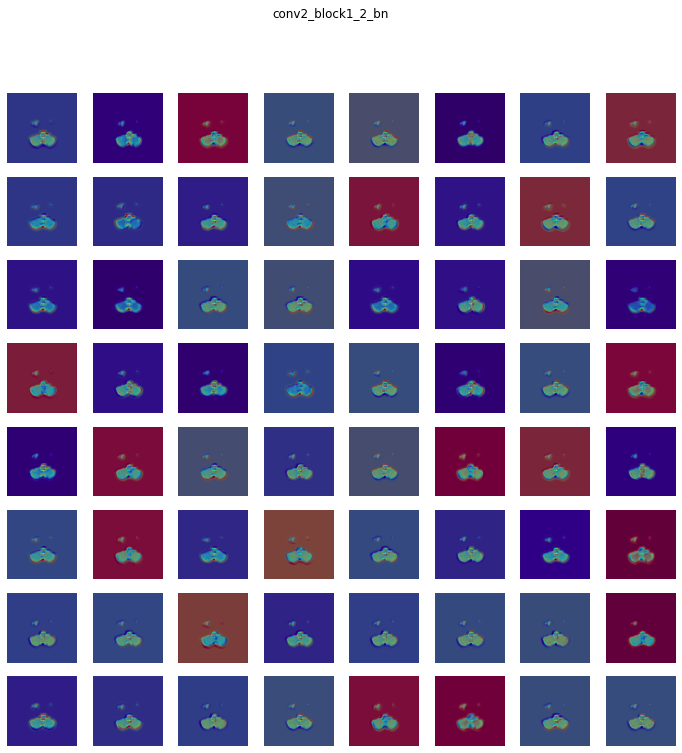

conv2_block1_2_relu (1, 64, 64, 64) 


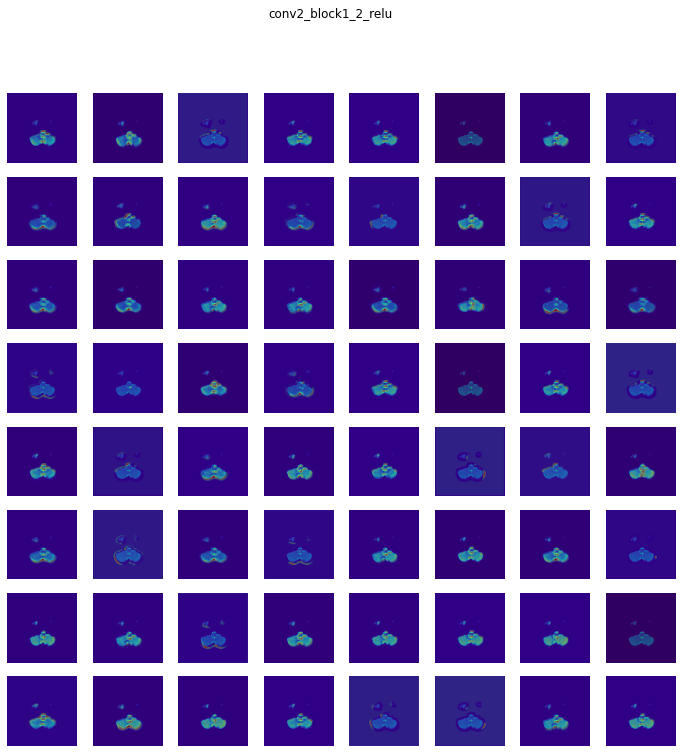

conv2_block1_0_conv (1, 64, 64, 256) 


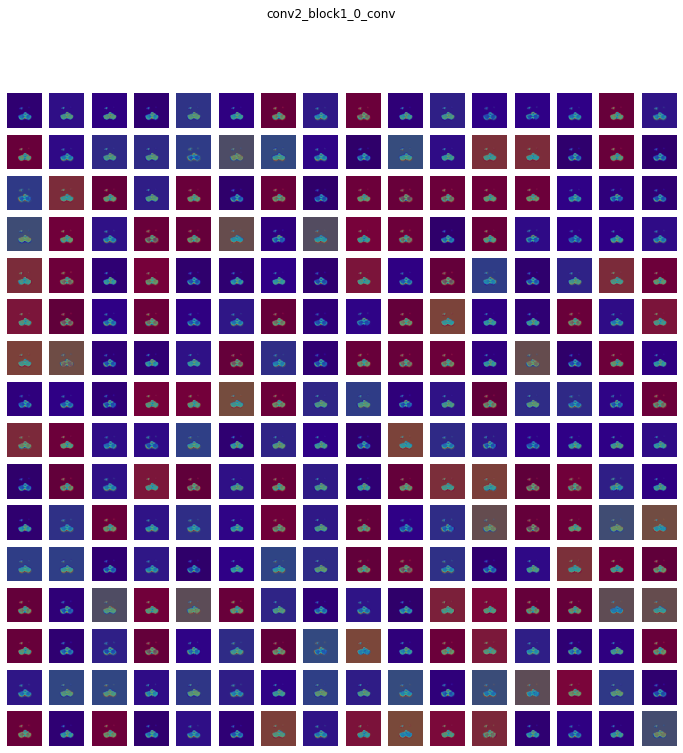

conv2_block1_3_conv (1, 64, 64, 256) 


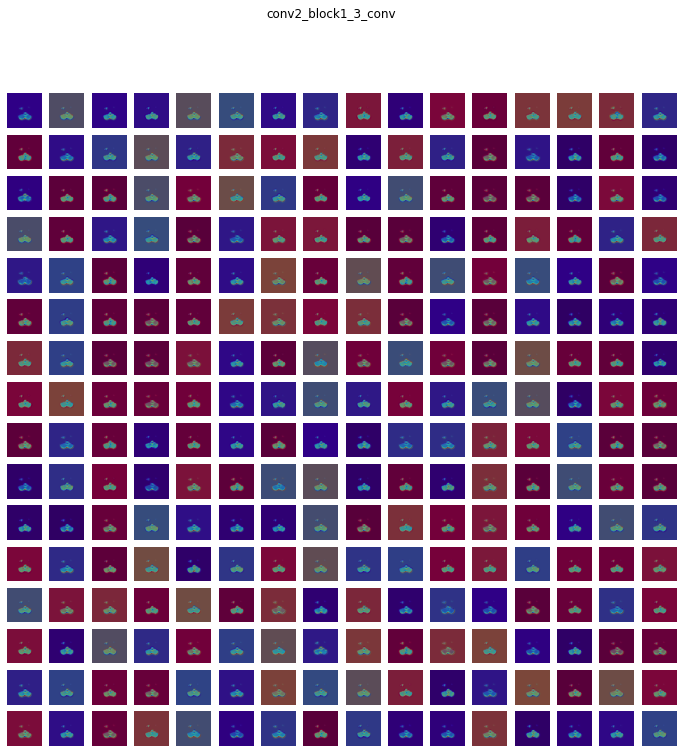

conv2_block1_0_bn (1, 64, 64, 256) 


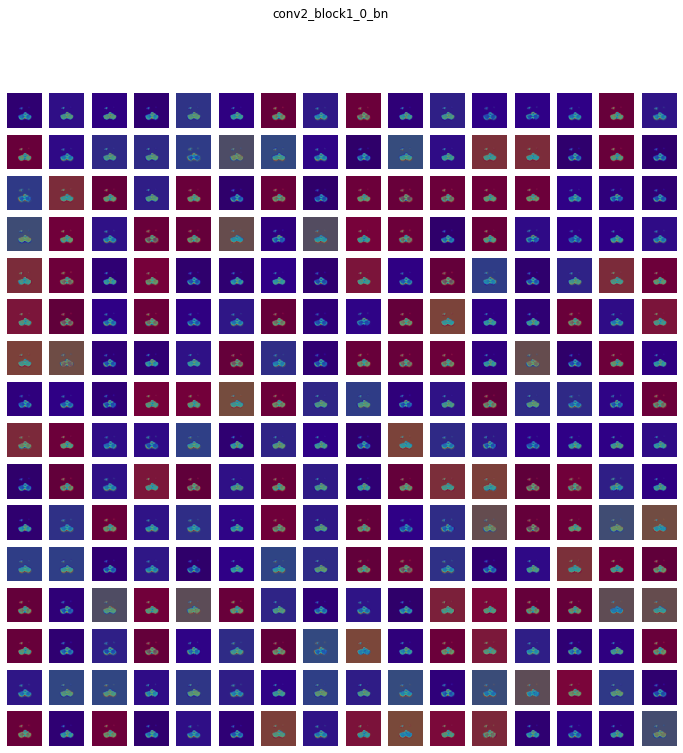

conv2_block1_3_bn (1, 64, 64, 256) 


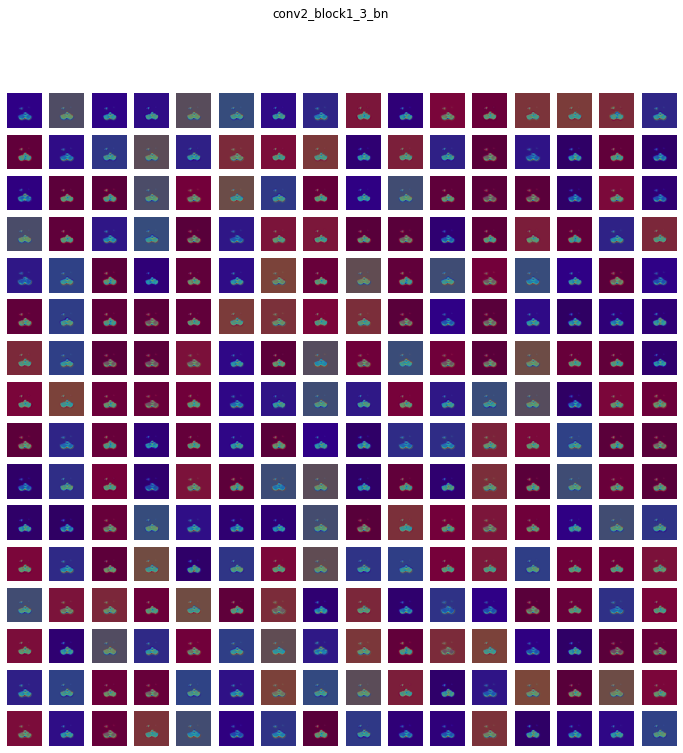

conv2_block1_add (1, 64, 64, 256) 


conv2_block1_out (1, 64, 64, 256) 


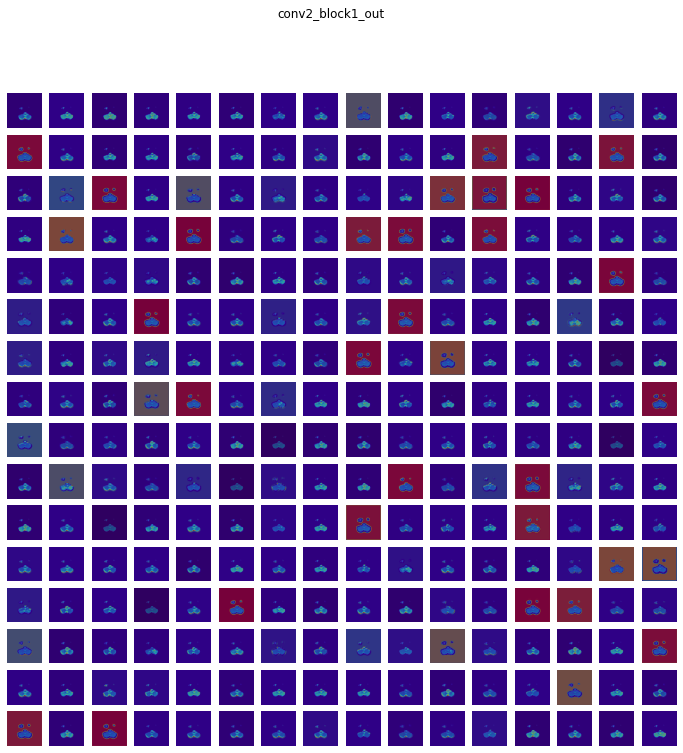

conv2_block2_1_conv (1, 64, 64, 64) 


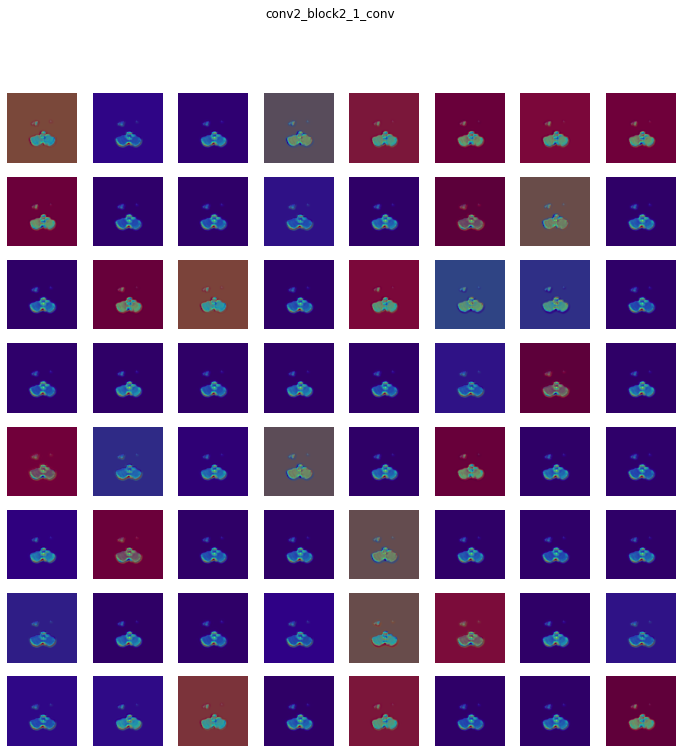

conv2_block2_1_bn (1, 64, 64, 64) 


conv2_block2_1_relu (1, 64, 64, 64) 


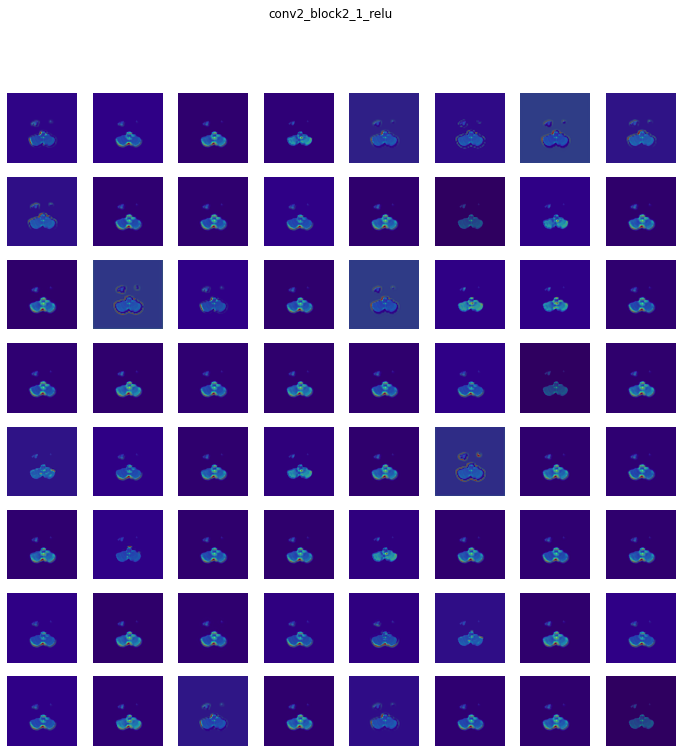

conv2_block2_2_conv (1, 64, 64, 64) 


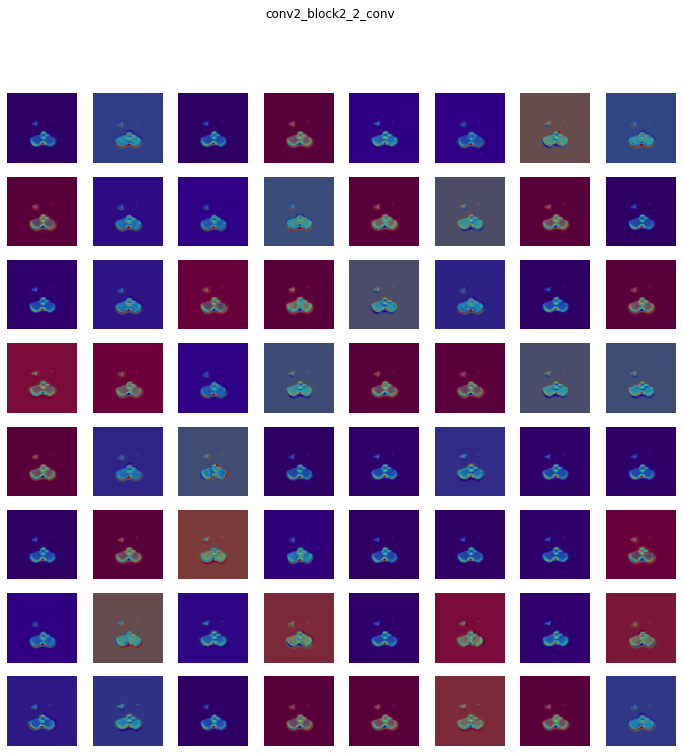

conv2_block2_2_bn (1, 64, 64, 64) 


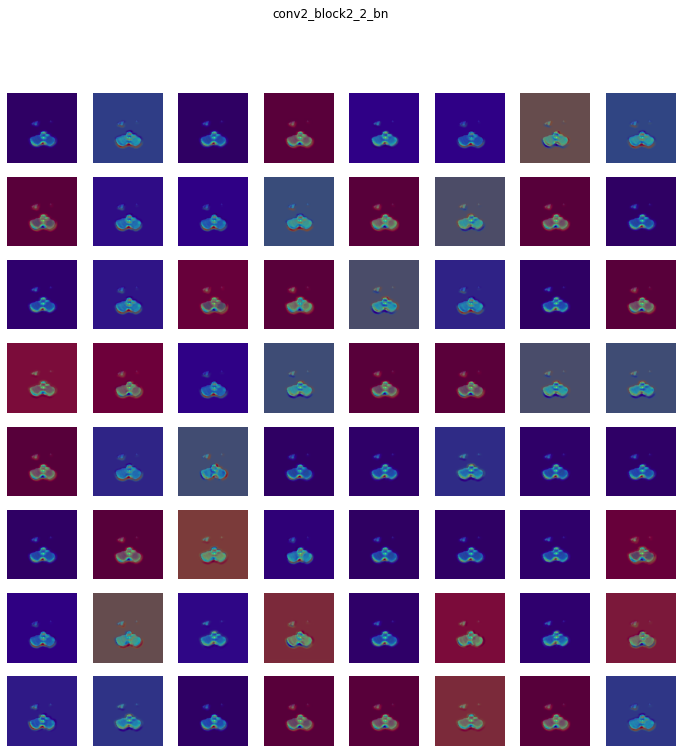

conv2_block2_2_relu (1, 64, 64, 64) 


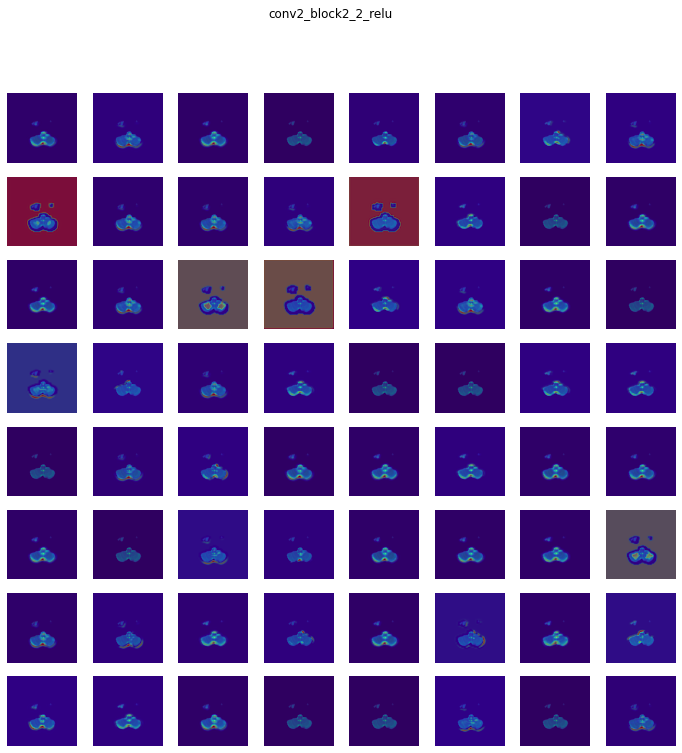

conv2_block2_3_conv (1, 64, 64, 256) 


conv2_block2_3_bn (1, 64, 64, 256) 


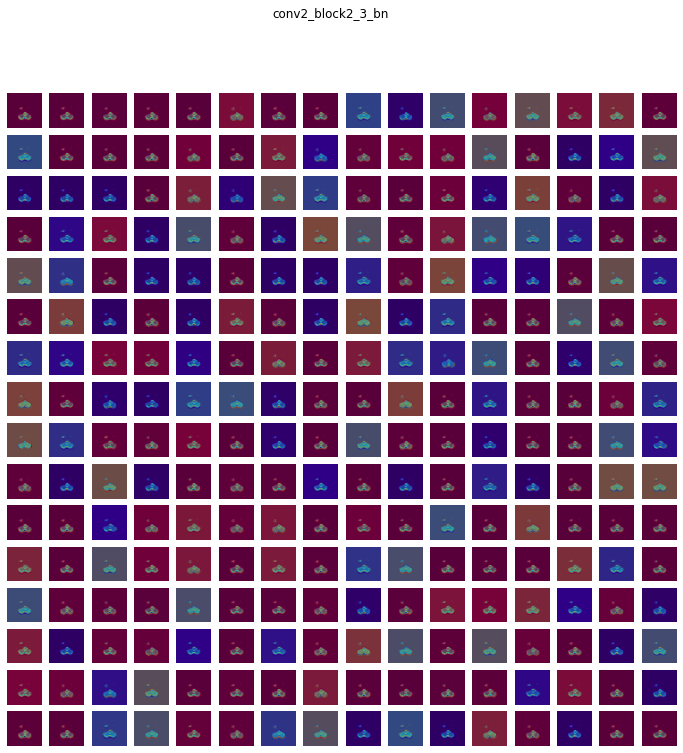

conv2_block2_add (1, 64, 64, 256) 


conv2_block2_out (1, 64, 64, 256) 


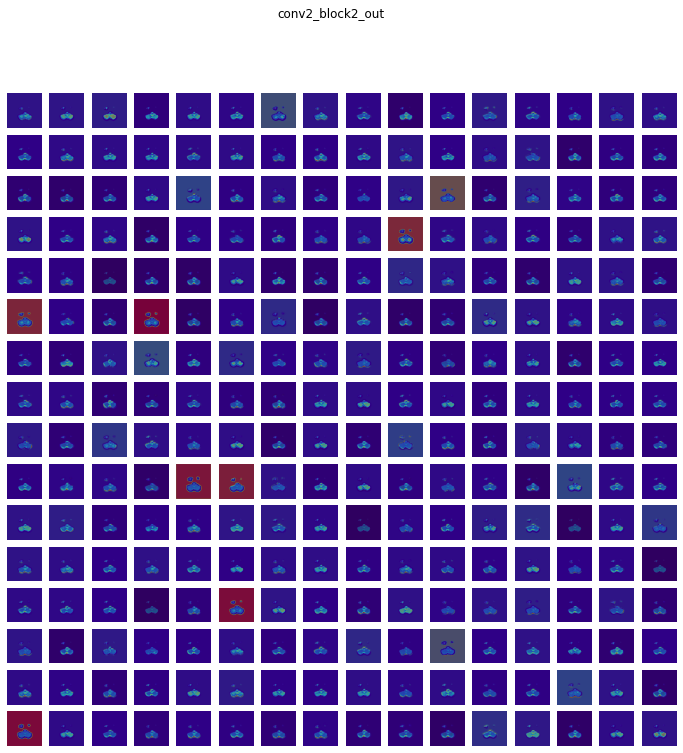

conv2_block3_1_conv (1, 64, 64, 64) 


conv2_block3_1_bn (1, 64, 64, 64) 


conv2_block3_1_relu (1, 64, 64, 64) 


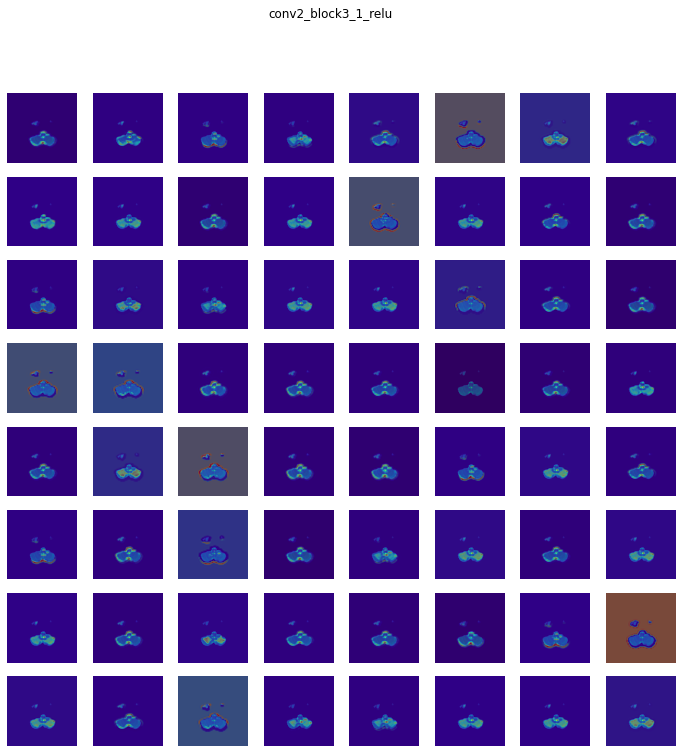

conv2_block3_2_conv (1, 64, 64, 64) 


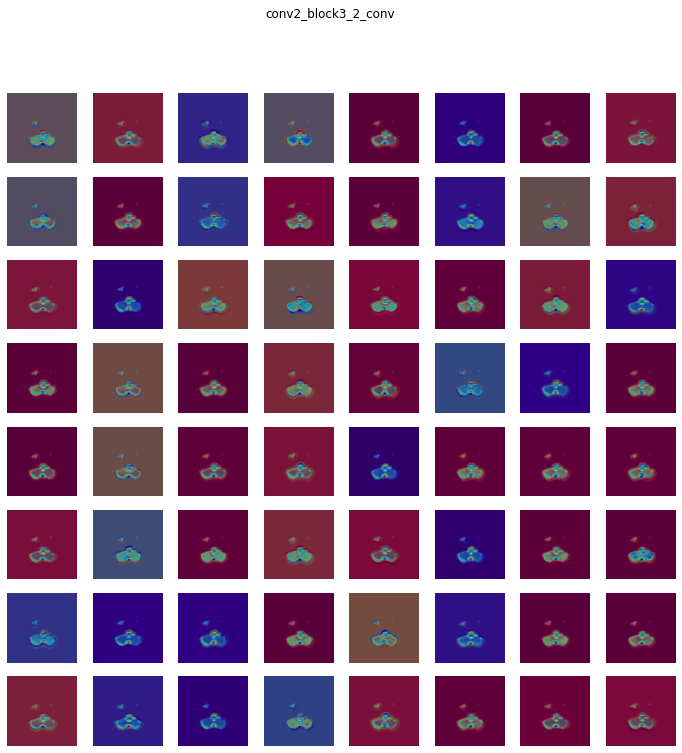

conv2_block3_2_bn (1, 64, 64, 64) 


conv2_block3_2_relu (1, 64, 64, 64) 


conv2_block3_3_conv (1, 64, 64, 256) 


conv2_block3_3_bn (1, 64, 64, 256) 


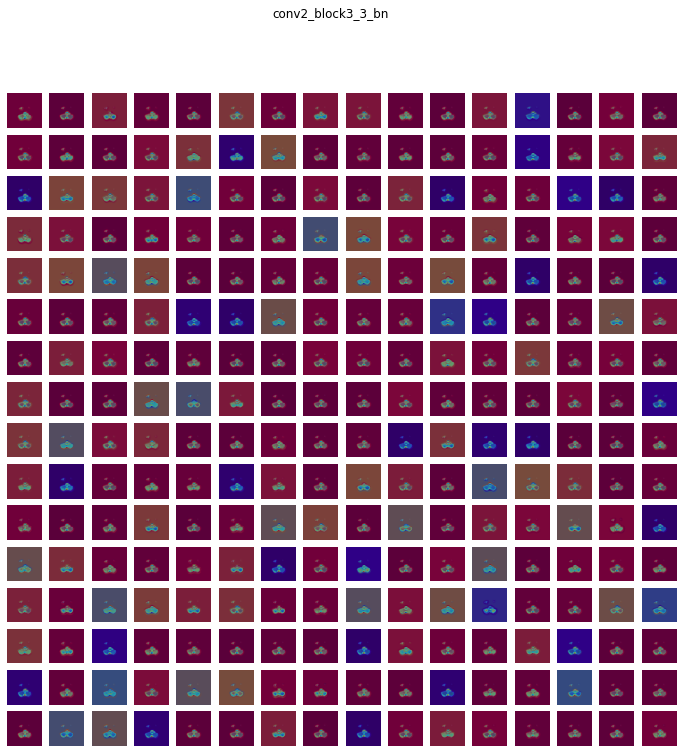

conv2_block3_add (1, 64, 64, 256) 


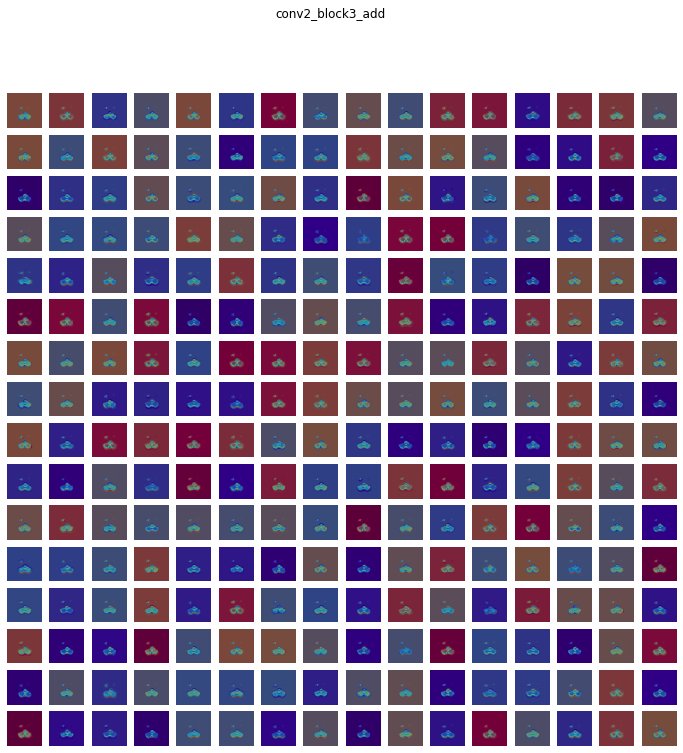

conv2_block3_out (1, 64, 64, 256) 


conv3_block1_1_conv (1, 32, 32, 128) 


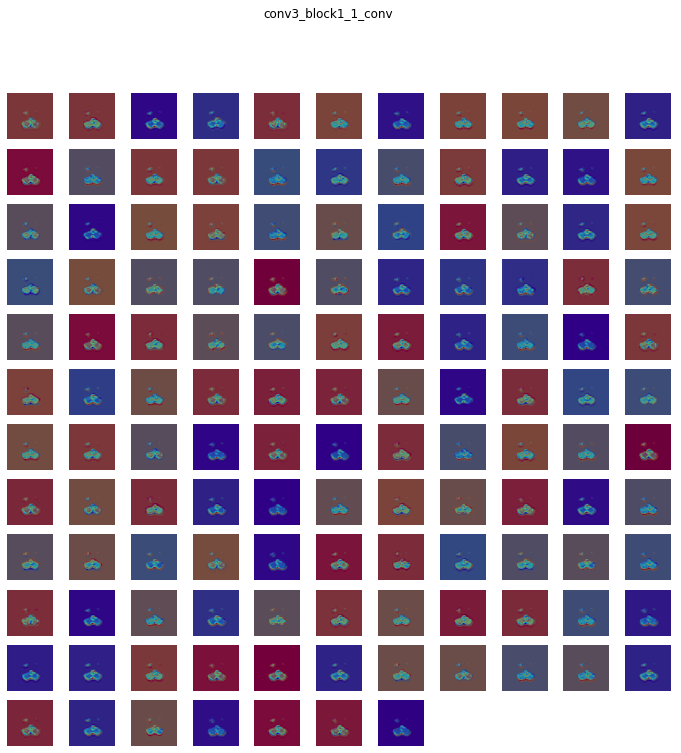

conv3_block1_1_bn (1, 32, 32, 128) 


conv3_block1_1_relu (1, 32, 32, 128) 


conv3_block1_2_conv (1, 32, 32, 128) 


KeyboardInterrupt: 

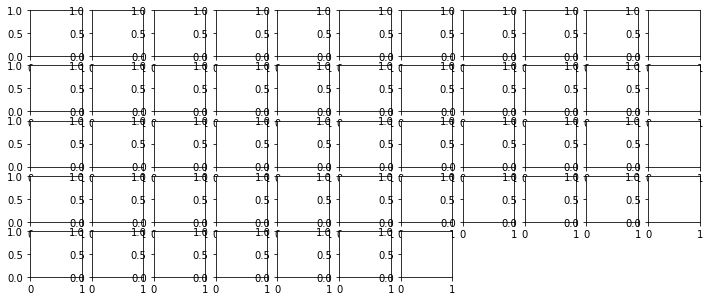

In [45]:
#keract.display_heatmaps(activations, img, save=False)

In [49]:
want = ['conv5_block3_add', 'conv5_block3_out', 'global_average_pooling2d', 'dense', 'dense_1']
filteractivations = {K:activations[K] for K in want}

conv5_block3_add (1, 8, 8, 2048) 


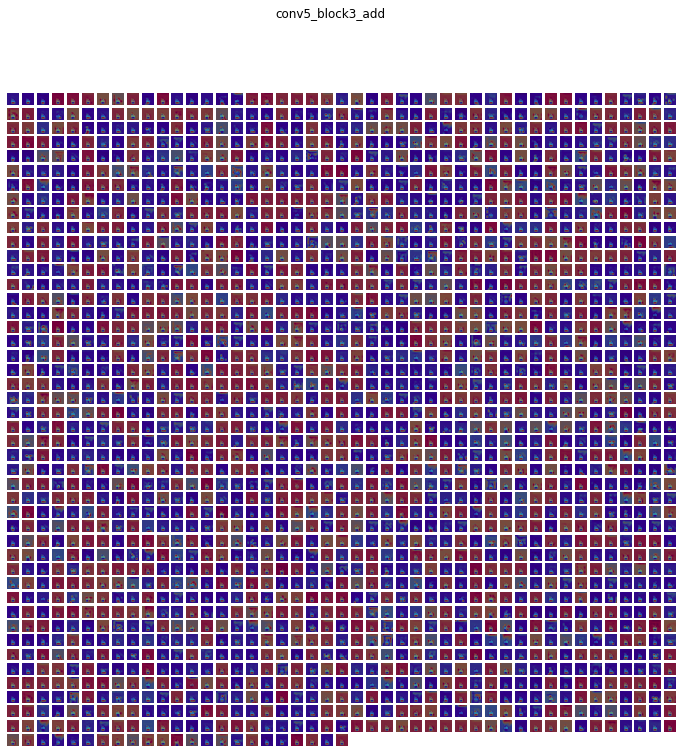

conv5_block3_out (1, 8, 8, 2048) 


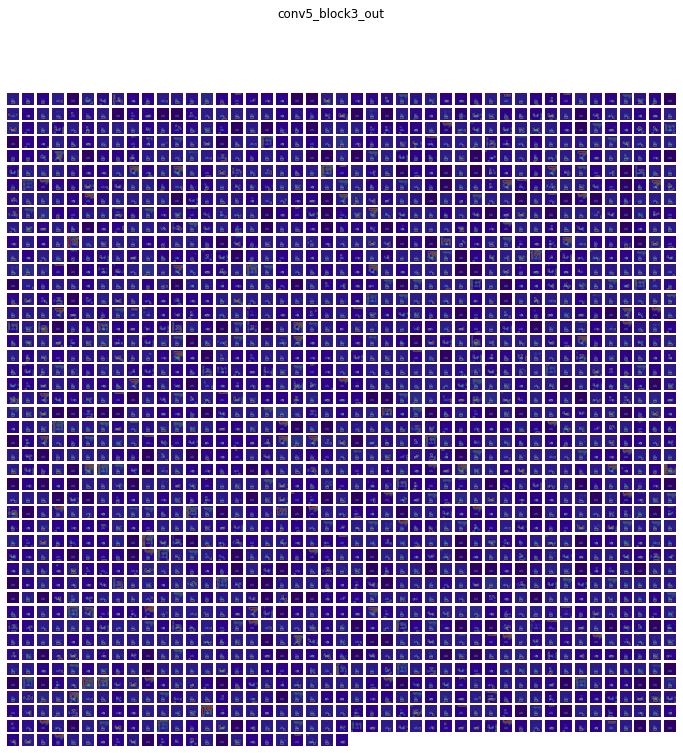

global_average_pooling2d (1, 2048) -> Skipped. 2D Activations.
dense (1, 1024) -> Skipped. 2D Activations.
dense_1 (1, 2) -> Skipped. 2D Activations.


In [51]:
keract.display_heatmaps(filteractivations, img, save=False)